In [1]:
#Import some useful packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
from tqdm.auto import tqdm, trange

!pip install pyscreenshot

#Set up parallel processing
import concurrent.futures
import multiprocessing
num_processes = multiprocessing.cpu_count()
print("There are "+str(num_processes)+" logical cores on this system.")
global_starttime = time.time()

There are 8 logical cores on this system.


# Data acquisition

This project aims to understand the factors influencing the occurance and the severity of road traffic accidents in the Seattle area. Data for road traffic accidents between 2004-2020 were obtained from the Seattle Open Data portal and saved as CSV for analysis using Python.

http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

A PDF with "Attribute Information" metadata describes the meanings of each column in the dataset, and is available at the same URL

In [2]:
#Read data from the downloaded CSV file and import in to a Pandas dataframe
path = 'C:/Users/sashankkanakala/Desktop/Yashwanth/Data-Collisions.csv'
df = pd.read_csv(path)

#Get the size of the original dataset prior to cleaning
#This will be useful when we later quantify what percentage of the
#data we lose during cleaning.
df_shape_orig = df.shape
print("Shape of the original data frame: "+str(df.shape[0])+' x '+str(df.shape[1]))

Shape of the original data frame: 194673 x 38


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Check the first few rows of data to see what we are dealing with
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(25)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK M

In [4]:
#Check the types of data in the dataframe
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
print(df.loc[0,:])

SEVERITYCODE                                                      2
X                                                          -122.323
Y                                                           47.7031
OBJECTID                                                          1
INCKEY                                                         1307
COLDETKEY                                                      1307
REPORTNO                                                    3502005
STATUS                                                      Matched
ADDRTYPE                                               Intersection
INTKEY                                                        37475
LOCATION                                 5TH AVE NE AND NE 103RD ST
EXCEPTRSNCODE                                                      
EXCEPTRSNDESC                                                   NaN
SEVERITYCODE.1                                                    2
SEVERITYDESC                                    

In [6]:
#Check where there are NaNs in the dataframe
print(df.isnull().sum(axis=0))

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


# Data Cleaning

The data obtained from the Seattle Open Data website are not, in their original form, usable for the purposes of model building. There are a number of issues which must be addressed:

1. **Rows which are missing information about the target variable:** the objective of this model is to predict the car accident severity code ( _SEVERITYCODE_ ) from the given features. However as we can see from the previous cell, there are 21,602 accidents in the dataframe with _SEVERITYCODE_ =0, corresponding to an accident with "Unknown" severity. Clearly we cannot use accidents whose severity is unknown to train/test a model designed to predict accident severity, so these rows will be dropped.

2. **Columns containing useless/redundant data. These columns can be removed from the dataframe and include**:
    * _OBJECTID_ - this is just an database key, but Pandas creates its own key on import.
    * _COLDETKEY_ - this is just a duplicate of INCKEY, and probably arises due to a cross-matching of tables on the Seattle Open Data website. We will keep INCKEY as a unique identifier for each accident, but do not need to keep the duplicate column
    * _REPORTNO_ - this is just another identifier for the accident, this time tying the record to the individual piece of paperwork that was filed to report the accident. This is not useful for building our model.
    * _STATUS_ - the meaning of this column is unclear (and is not explained in the Attribute Information metadata). The values are either "Matched" or "Unmatched".
    * _EXCEPTRSNCODE, EXCEPTRSNDESC_ - these columns are listed in the Attribute Information metadata, but their meanings are not explained. EXCEPTRSNCODE is blank/NaN in ~99% of the data, with 2,480 accidents having a non-blank entry, all of which are the same ("NEI"). According to EXCEPTRSNDESC this means "Not Enough Information".
    * _INCDATE_ - this column is just a duplicate of the more easily parsable INCDTTM
    * _SDOTCOLNUM_ - this is another unique identifier for each accident, however as we are planning to keep INCKEY, keeping this second unique identifier is redundant.
    
3. **Rows which are missing information about some of the features which we expect will be key to building the model:** as we can see from df.head, a number of accidents (accounting for ~15% of the dataset) have "Unknown" values for attributes like _WEATHER_ , _ROADCOND_ and _LIGHTCOND_ , or have these fields blank/NaN, which in practice means the same thing. As these are expected to be among the features which influence the likelihood and severity of accidents, we have to consider discarding these rows before training the model.

4. **Presence of features with categorical values:** In order to construct a model using Machine Learning techniques, we must take columns which contain categorical data and re-cast them in numeric form. Different techniques will be used to accomplish this, depending on the nature of the data in these columns.
    * Awkwardly, the target variable _SEVERITYCODE_ is itself a categorical variable, having the values \[0, 1, 2, 2b, 3\]. For reasons given previously, we will be dropping all accidents with _SEVERITYCODE_ =0, however we are still left with the categorical value '2b'. To facilitate modelling, I will switch the codes \[0, 1, 2, 2b, 3\] for codes \[0, 1, 2, 3, 4\], i.e. relabelling '2b' as '3', and relabelling '3' as '4'.
    * Some columns, such as _UNDERINFL_ and _HITPARKEDCAR_ contain a mixture of alphanumeric (Y/N or 1/0), boolean (True/False) and missing (NaN) data. To prepare the data for modelling it will be important to homogenise these data by treating 1, Y and True as equivalent (and setting these to 1) and treating 0, N and False as equivalent (setting these to 0). Furthermore, we can infer that missing values (represented with NaN) are equivalent to 0/False.
    * Other columns contain labelled data (e.g. _WEATHERCOND_ , which takes one of a handful of values such as _RAIN_ , _CLEAR_ , _SNOWING_ , etc). These can be prepared for modelling by using One-Hot Encoding, wherein a new column is created for each of the discrete values corresponding to the original variable/column, which is filled with 1s or 0s depending on the value in that column.
    
5. **Incorporating timestamp information:** The _INCDTTM_ column contains the incident date/time in alphanumeric form. This can be parsed to an actual timestamp using Pandas, and then separated in to separate columns for Hour, Day (of month) Day (of week), Month and Year to study temporal trends
    
6. **Other issues:** after performing the above data engineering issues, we will create a copy of the data frame (minus any columns which will not be used for model-building) and perform a final check for any remaining NaNs/missing data. We will decide how to handle these later.
    
    
Okay, let's get started!



## Data Cleaning 1: Missing target variable


In [7]:
#Check for and remove any rows with SEVERITYDESC = "Unknown"
print("Give a run-down of the values present in the table for SEVERITYCODE:")
print(df["SEVERITYDESC"].value_counts())

#Identify and remove rows with SEVERITYDESC = "Unknown"
todrop = df["SEVERITYDESC"] == 'Unknown'
print("\n Preparing to drop "+str(todrop.values.sum())+" rows.")
df.drop(df.index[todrop], inplace=True)
print("Done!")

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

Give a run-down of the values present in the table for SEVERITYCODE:
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

 Preparing to drop 0 rows.
Done!


## Data Cleaning 2: Removing unnecessary columns

In [8]:
#Begin by checking whether these columns exists in the dataset and if so, delete them:
if 'OBJECTID' in df:
    del df["OBJECTID"]
if 'COLDETKEY' in df:
    del df["COLDETKEY"]
if 'REPORTNO' in df:
    del df["REPORTNO"]
if 'STATUS' in df:
    del df["STATUS"]
if 'EXCEPTRSNCODE' in df:
    del df["EXCEPTRSNCODE"]
if 'EXCEPTRSNDESC' in df:
    del df["EXCEPTRSNDESC"]
if 'INCDATE' in df:
    del df["INCDATE"]
if 'SDOTCOLNUM' in df:
    del df["SDOTCOLNUM"]
if 'STCOLCODE' in df:
    del df["STCOLCODE"]

## Data Cleaning 3: Removing rows where key features are missing

In [9]:
#Find missing WEATHERCOND
todrop1 = df["WEATHER"] == 'Unknown'
noweatherinfo = todrop1.values.sum()

#Find missing ROADCOND
todrop2 = df["ROADCOND"] == "Unknown"
noroadcondinfo = todrop2.values.sum()

#Find missing LIGHTCOND
todrop3 = df["LIGHTCOND"] == "Unknown"
nolightinfo = todrop3.values.sum()

#Collate these and remove
df["TODROP"] = 0
count_noweather = 0
count_noinfo = 0
for i in range(0,len(todrop1)):
    if todrop1[i] == True or todrop2[i] == True or todrop3[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(noweatherinfo)+" accidents with no weather information.")
print("There are "+str(noroadcondinfo)+" accidents with no road condition information.")
print("There are "+str(nolightinfo)+" accidents with no information about light conditions.")
print("There are "+str(df["TODROP"].values.sum())+" accidents without one or more of the above.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
shape0 = df.shape
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Print info about DF shape before and after
print("Shape of DF before: "+str(shape0[0])+" x "+str(shape0[1]))
print("Shape of DF after: "+str(df.shape[0])+" x "+str(df.shape[1]))
print("The original DF had shape: "+str(df_shape_orig[0])+" x "+str(df_shape_orig[1]))

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
    del df["level_0"]
    del df["index"]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


There are 15091 accidents with no weather information.
There are 15078 accidents with no road condition information.
There are 13473 accidents with no information about light conditions.
There are 18902 accidents without one or more of the above.
 Deleting now...
Shape of DF before: 194673 x 32
Shape of DF after: 175771 x 32
The original DF had shape: 194673 x 38


## Data Cleaning 4: Dealing with categorical variables

In [10]:
#Make the target variable numerical by changing [0, 1, 2, 2b, 3] to [0, 1, 2, 3, 4]
#Print the range of codes before cleaning:
print(df["SEVERITYCODE"].value_counts())

#Clean...
count2b = 0
count3  = 0
for i in range(0,len(df["SEVERITYCODE"])):
    if df["SEVERITYDESC"][i] == 'Serious Injury Collision':
        df["SEVERITYCODE"][i] = 3
        count2b += 1
    if df["SEVERITYDESC"][i] == 'Fatality Collision':
        df["SEVERITYCODE"][i] = 4
        count3 += 1
        
#Make sure that SEVERITYCODE is cast as an integer, rather than an object
df = df.astype({'SEVERITYCODE':np.int})
        
#Confirm that the range of codes after cleaning is as expected:
print("\n Changed "+str(count2b)+" entries from 2b->3 and "+str(count3)+" from 3->4. \n The tables now look like:")
print(df["SEVERITYCODE"].value_counts())
print(df["SEVERITYDESC"].value_counts())

1    118788
2     56983
Name: SEVERITYCODE, dtype: int64

 Changed 0 entries from 2b->3 and 0 from 3->4. 
 The tables now look like:
1    118788
2     56983
Name: SEVERITYCODE, dtype: int64
Property Damage Only Collision    118788
Injury Collision                   56983
Name: SEVERITYDESC, dtype: int64


In [11]:
#Take columns with mixed boolean data types ([1, "Y", True],[0, "N", False] etc) and cast them as numerical variables
#SPEEDING, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, HITPARKEDCAR
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [12]:
df["WEATHER"].value_counts()

Clear                       109086
Raining                      32763
Overcast                     27008
Snowing                        837
Fog/Smog/Smoke                 555
Other                          266
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               48
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [13]:
df["LIGHTCOND"].value_counts()

Daylight                    112891
Dark - Street Lights On      46910
Dusk                          5675
Dawn                          2424
Dark - No Street Lights       1416
Dark - Street Lights Off      1124
Other                          201
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [14]:
df["ROADCOND"].value_counts()

Dry               121957
Wet                46523
Ice                 1099
Snow/Slush           850
Other                111
Standing Water       108
Sand/Mud/Dirt         67
Oil                   61
Name: ROADCOND, dtype: int64

In [15]:
df["ADDRTYPE"].value_counts()

Block           111321
Intersection     63008
Alley              603
Name: ADDRTYPE, dtype: int64

In [16]:
#Use One Hot Encoding to deal with categorical data
#Get dummies for one-hot encoding
weatherdummies = pd.get_dummies(df["WEATHER"])
lightconddummies = pd.get_dummies(df["LIGHTCOND"])
roadconddummies = pd.get_dummies(df["ROADCOND"])
addrtypedummies = pd.get_dummies(df["ADDRTYPE"])

#There is an "other" column in each of the above DFs -- rename these to avoid confusion
#when the DataFrames are merged
weatherdummies.rename(columns={"Other": "Other weather"}, inplace=True)
lightconddummies.rename(columns={"Other": "Other light"}, inplace=True)
roadconddummies.rename(columns={"Other": "Other roadcond"}, inplace=True)

#Now use one-hot encoding on SDOT_COLCODE
colcodedummies = pd.get_dummies(df["SDOT_COLCODE"])
columns = colcodedummies.columns
for col in columns:
    colcodedummies = colcodedummies.rename(columns={col: 'SDOT_COLCODE_'+str(col)})

#Join columns to existing DataFrame
#data_frames = [df, weatherdummies, lightconddummies, roadconddummies, addrtypedummies]
df = df.join(weatherdummies)
df = df.join(lightconddummies)
df = df.join(roadconddummies)
df = df.join(addrtypedummies)
df = df.join(colcodedummies)

In [25]:
print(colcodedummies.shape)
colcodedummies.head(5)

(175771, 39)


,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,SDOT_COLCODE_23,SDOT_COLCODE_24,SDOT_COLCODE_25,SDOT_COLCODE_26,SDOT_COLCODE_27,SDOT_COLCODE_28,SDOT_COLCODE_29,SDOT_COLCODE_31,SDOT_COLCODE_32,SDOT_COLCODE_33,SDOT_COLCODE_34,SDOT_COLCODE_35,SDOT_COLCODE_36,SDOT_COLCODE_44,SDOT_COLCODE_46,SDOT_COLCODE_47,SDOT_COLCODE_48,SDOT_COLCODE_51,SDOT_COLCODE_52,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Cleaning 5: Incorporating date/time as timestamps

In [26]:
#Separate Date/Time from INCDTTM colum and create columns for Hour/Minute, Day/Month/Year
df["INC_DATE_TIME"] = pd.to_datetime(df["INCDTTM"])
df["MONTH"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).month
df["DAY_OF_WEEK"] = df["INC_DATE_TIME"].dt.dayofweek
df["DAY_OF_MONTH"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).day
df["YEAR"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).year

#Find the nearest whole hour to the time the collision occurred, e.g. 14:25 -> 14:00 and 14:35 -> 15:00
from datetime import datetime, timedelta

#Create new columns
df["TIME_ROUNDED_TO_NEAREST_HOUR"] = 0
df["DAY_STRING"] = 0
df["MONTH_STRING"] = 0
df["WEEKEND"] = 0

#Define some useful functions
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

def get_dow(day_int):
    if day_int == 0:
        dow = 'Mon'
    if day_int == 1:
        dow = 'Tue'
    if day_int == 2:
        dow = 'Wed'
    if day_int == 3:
        dow = 'Thu'
    if day_int == 4:
        dow = 'Fri'
    if day_int == 5:
        dow = 'Sat'
    if day_int == 6:
        dow = 'Sun'
    return dow

def get_month(month_int):
    if month_int == 1:
        monthstring = 'Jan'
    if month_int == 2:
        monthstring = 'Feb'
    if month_int == 3:
        monthstring = 'Mar'
    if month_int == 4:
        monthstring = 'Apr'
    if month_int == 5:
        monthstring = 'May'
    if month_int == 6:
        monthstring = 'Jun'
    if month_int == 7:
        monthstring = 'Jul'
    if month_int == 8:
        monthstring = 'Aug'
    if month_int == 9:
        monthstring = 'Sep'
    if month_int == 10:
        monthstring = 'Oct'
    if month_int == 11:
        monthstring = 'Nov'
    if month_int == 12:
        monthstring = 'Dec'
    return monthstring
     
def is_weekend(day_int):
    if day_int <= 4:
        isweekend = 0
    else:
        isweekend = 1
    return isweekend

start_time = time.time()
#Get the day of the week from its integer value (0-6)
print("Get the day of the week from its integer value (0-6):")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["DAY_STRING"] = list(tqdm(pool.map(get_dow, df["DAY_OF_WEEK"], chunksize=10), total=df.shape[0]))
    
#Get the name of the month from its integer value (1-12)
print("Get the name of the month from its integer value (1-11):")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["MONTH_STRING"] = list(tqdm(pool.map(get_month, df["MONTH"], chunksize=10), total=df.shape[0]))
    
#Round time to the nearest whole hour
print("Round time to the nearest whole hour:")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["TIME_ROUNDED_TO_NEAREST_HOUR"] = list(tqdm(pool.map(hour_rounder, df["INC_DATE_TIME"], chunksize=10), total=df.shape[0]))
    
#Check if an accident occurred on the weekend or not
print("Check if an accident occurred on the weekend or not:")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["WEEKEND"] = list(tqdm(pool.map(is_weekend, df["DAY_OF_WEEK"], chunksize=10), total=df.shape[0]))
       
elapsed_time = time.time() - start_time
print("Elapsed time for parallel FOR loop (seconds): "+str(elapsed_time))
        
#Now store the nearest hour to the time of the accident as an integer and delete the rounded Datetime
df["HOUR_NEAREST"] = pd.DatetimeIndex(df["TIME_ROUNDED_TO_NEAREST_HOUR"]).hour
del df["TIME_ROUNDED_TO_NEAREST_HOUR"]

#Check the result of this
df.head(5)

Get the day of the week from its integer value (0-6):


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

## Data Cleaning 6: Other issues

There are 16 accidents with no data for _ST\_COLCODE_ , meaning we do not have a clear description of exactly what kind of accident occurred. This is a tiny fraction of the data, and it would be useful to include this feature in modelling. Rather than try to fudge the model by populating these missing values with the modal value for _ST\_COLCODE_ we will simply get rid of these rows from the dataframe.

Of more pressing concern, there are a large number of accidents with no Latitude/Longitude information. Let's explore these in more detail.

In [ ]:
#Check the dataframe for any NaNs
print(df.isnull().sum(axis=0))

In [ ]:
#ST_COLCODE
#Find NaNs and set these to spaces.
print("How many are null: "+str(df["ST_COLCODE"].isnull().sum()))
print("Try to populate these with -999")
df["ST_COLCODE"].fillna(' ', inplace=True)
print("How many are null: "+str(df["ST_COLCODE"].isnull().sum()))

#Get rid of accidents with no ST_COLCODE (null and/or former NaNs)
todrop = df["ST_COLCODE"] == ' '

#Collate these and remove
df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(df["TODROP"].values.sum())+" accidents without an ST_COLCODE.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
    del df["index"]

#Cast from type 'object' to type 'int'
df = df.astype({'ST_COLCODE':np.int64})
    
print("Dataframe shape now:")
df.shape

In [ ]:
#Missing geographical data
#Find null values and replace these with NaN
#Find NaNs and set these to spaces.
print("There are "+str(df["X"].isnull().sum())+" null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.")

#Go through the accidents with no X,Y data and see if we can match them to others
#that share the same INTKEY
df["NOT_HAS_COORDS"] = df["X"].isnull()
count = 0
for i in range(0,len(df["X"])):
    if df["NOT_HAS_COORDS"][i] == True:
        if df["INTKEY"][i] > 0:
            #Find other accidents which share the same INTKEY
            matched_intersections = df.loc[df["INTKEY"] == df["INTKEY"][i]]
            #Do any of these have the required X,Y data?
            with_geodata = matched_intersections["X"].count()
            if with_geodata > 0:
                matched_intersections.head()
                count += 1

if "NOT_HAS_COORDS" in df:
    del df["NOT_HAS_COORDS"]
    
print("Added locations for "+str(count)+" accidents based on shared INTKEYS.")

From the previous cell we see that if X,Y data is missing for an accident, it is missing for all accidents that share the same INTKEY. Presumably Seattle have misplaced a few of their intersections...

In [ ]:
#Remove accidents from the database which still have no location information
#X, Y
#Find NaNs and set these to spaces.
print("There are "+str(df["X"].isnull().sum())+" accidents with no location information")
print("Populate these with -999 and then delete")
df["X"].fillna(-999, inplace=True)
print("There are now "+str(df["ST_COLCODE"].isnull().sum())+" with NaN/null locations.")
print("I will now delete these...")

#Get rid of accidents with no ST_COLCODE (null and/or former NaNs)
todrop = df["X"] == -999

#Collate these and remove
df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(df["TODROP"].values.sum())+" accidents without an location.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
    del df["index"]

print("Dataframe shape now:")
df.shape

## Data Cleaning: Final remarks

We have spent a lot of time and effort so far cleaning the dataframe "df". This has included dropping uninformative columns, dropping rows which are missing one or more pieces of key information and casting categorical data in to numerical forms (integets/floats) that are suitable for machine learning algorithms to get their teeth into. 

There are still some columns which we have kept so far as they have been informative up until now (e.g. _SDOT\_COLDESC_ , which provides a description of the meaning of _SDOT\_COLCODE_ ) but these too will have to be excluded from the dataframe before model-building can begin. Rather than drop these columns from the dataframe "df" we will instead create a new dataframe called "data", and simply drop the unnecessary columns from there. 

In this manner it will be trivial to re-copy them back from "df" later if required.

In [ ]:
#Keep the full dataframe, but create a copy which drops columns which will not be used for modelling
data = df.copy()
if 'INCKEY' in df:
    del data["INCKEY"]
    del data["INTKEY"]
    del data["ADDRTYPE"]
    del data["LOCATION"]
    del data["SEVERITYDESC"]
    del data["COLLISIONTYPE"]
    del data["INCDTTM"]
    del data["JUNCTIONTYPE"]
    del data["SDOT_COLDESC"]

This is the dataframe that will be used for model building. Let's take a look at it in more detail, shall we?

In [ ]:
print("The shape of the dataframe is:")
print(data.shape)

In [ ]:
print("The data types are:")
data.dtypes

In [ ]:
print("Here is a count of how many null/NaN values there are in each column:")
print(data.isnull().sum(axis=0))

## Data Exploration 1: Where do accidents occur?

The Seattle Open Data portal record of traffic accidents include the latitude and longitude (as X, Y, respectively) of every accident that occurred in the city council area. Let's create a map in Folium to see where these occur. This might highlight some key "choke points" in the city road network and give context for some of the predictions that eventually come out of the model.

In [ ]:
import folium

#Get the median latitude and logitude and centre the map there
lon_med = data["X"].mean()
lat_med = data["Y"].mean()

print(lat_med)
print(lon_med)

seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map

In [ ]:
import pyscreenshot as ImageGrab
from selenium import webdriver

#im=ImageGrab.grab()
#im.save('map1_seattle.png', format='png')
##im=ImageGrab.grab(bbox=(500,250,1480,830))

There are far too many accidents (>170,000) for us to plot each one individually on the map. However we can use choropleth map to visualise which parts of the city are more accident-prone.

In [ ]:
#Read the Seattle geojson data
import json
import requests

#GeoJSON file obtained from https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson
#!wget https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson
geofile = 'neighborhoods.geojson'

with open(geofile) as json_file:
    geodata = json.load(json_file)

print("There are "+str(len(geodata['features']))+" districts in the Seattle area:")

In [ ]:
#Convert latitude/longitude to point objects and find out which area they lie in
from shapely.geometry import shape, Point, Polygon
from shapely.ops import nearest_points
from time import strftime, gmtime
import random

    
def find_county(lon, lat):
    point = Point(lon, lat)
    found_nhood = 0
    '''Most accidents can be trivially located within a neighbourhood
       using the polygon.contains() function from shapely
    '''
    for i in range(0,len(geodata['features'])):
        polygon = shape(geodata['features'][i]['geometry'])
    if polygon.contains(point):
            nhood = geodata['features'][i]['properties']['name']
            found_nhood = 1
    if found_nhood == 0:
        '''Some accidents can't be located within neighbourhoods because
           they occur on major highways which mark neighbourhood boundaries:
           the "no man's land" problem. Let's deal with these by assigning
           them to the _nearest_ neighbourhood
        '''
        nhoods = []
        distances = np.zeros(len(geodata['features']))
        for i in range(0,len(geodata['features'])):
            polygon = shape(geodata['features'][i]['geometry'])
            distances[i] = point.distance(polygon)
            nhoods.append(geodata['features'][i]['properties']['name'])
            
        min_distance = np.where(distances == np.amin(distances)) 
        try:
            #Usually this finds the nearest district
            min_distance_index = int(min_distance[0])
        except:
            '''But sometimes the accident is exactly equidistant between
               two neighbourhood boundaries. In this case, choose one
               of the districts at random to avoid biasing the sample
            '''
            min_distance_index = int(random.choice(min_distance[0]))
        nhood = nhoods[min_distance_index]
        found_nhood = 1
        if found_nhood == 0:
            sys.exit("I'm sorry I can't do that Dave...")
    return nhood
    
start_time = time.time()

from tqdm.auto import tqdm, trange
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    data["NEIGHBOURHOOD"] = list(tqdm(pool.map(find_county, data['X'], data['Y'], chunksize=10), total=df.shape[0]))
    
        
elapsed_time = time.time() - start_time
print("Multi-thread elapsed time: "+str(strftime("%H:%M:%S", gmtime(elapsed_time))))

In [ ]:
print("There are "+str(data["NEIGHBOURHOOD"].isnull().sum())+" accidents with no neighbourhood information")
print("The number of accidents in each neighbourhood is as follows:")
data["NEIGHBOURHOOD"].value_counts()

In [ ]:
#Now count how many accidents there are in each neighbourhood
accidents_per_nhood = pd.DataFrame(data["NEIGHBOURHOOD"].value_counts())
accidents_per_nhood.reset_index(inplace=True)
accidents_per_nhood.rename(columns = {'NEIGHBOURHOOD':"COUNT"}, inplace=True)
accidents_per_nhood.rename(columns = {'index':"NEIGHBOURHOOD"}, inplace=True)

#Also calculate the average severity of accidents in each area for later
temp_df = data.groupby(['NEIGHBOURHOOD']).mean()
temp_df.reset_index(inplace=True)
accidents_per_nhood["MEAN_SEVERITY"] = 0.0
for i in range(0,len(accidents_per_nhood["NEIGHBOURHOOD"])):
    for j in range(0,len(temp_df["X"])):
        if accidents_per_nhood["NEIGHBOURHOOD"][i] == temp_df["NEIGHBOURHOOD"][j]:
            accidents_per_nhood["MEAN_SEVERITY"][i] = temp_df["SEVERITYCODE"][j]

accidents_per_nhood.head(5)

In [ ]:
print(folium.__version__)

#Now use the geojson data and create a choropleth map
threshold_scale = np.linspace(accidents_per_nhood['COUNT'].min(),
                              accidents_per_nhood['COUNT'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

# generate choropleth map using the accident data
seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map.choropleth(
    geo_data=geodata,
    data=accidents_per_nhood,
    columns=['NEIGHBOURHOOD', 'COUNT'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    nan_line_opacity=0.0,
    legend_name='N accidents per neighbourhood',
    reset=True
)

# display map
seattle_map

In [ ]:
#im=ImageGrab.grab()
#im.save('map2_number_of_accidents.png', format='png')
#im=ImageGrab.grab(bbox=(500,250,1480,830))

Unsurprisingly, accidents occur more regularly in some areas of the city than in others. But does the location in which an accident occurs tell us anything about the _severity_ of that accident?

In [ ]:
#Accident severity map
threshold_scale = np.linspace(accidents_per_nhood['MEAN_SEVERITY'].min(),
                              accidents_per_nhood['MEAN_SEVERITY'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

#Generate a choropleth map of the mean accident severity in each neighbourhood
seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map.choropleth(
    geo_data=geodata,
    data=accidents_per_nhood,
    columns=['NEIGHBOURHOOD', 'MEAN_SEVERITY'],
    key_on='feature.properties.name',
    #threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    nan_line_opacity=0.0,
    legend_name='Average severity code of accidents',
    reset=True
)

# display map
seattle_map

In [ ]:
#im=ImageGrab.grab()
#im.save('map3_accident_severity.png', format='png')
#im=ImageGrab.grab(bbox=(500,250,1480,830))

There seems to be a trend for accidents to be more severe in the North of the city than elsewhere: four of the five areas with the highest mean accident severity are North of the Washington Ship Canal. It is likely that geography will serve as a good feature for the model. 

## Data exploration 2 -- histograms

In [ ]:
#Import Matplotlib and prepare inline plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

#Set up gpplot style
mpl.style.use('ggplot')

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [ ]:
#A reminder of what columns are in the dataset:
df.head(5)

In [ ]:
df["ADDRTYPE"].value_counts()

In [ ]:
print("There are "+str(len(df))+" entries in df currently.")

#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Accident severities
plt.subplot(2,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,2)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='#37777D')
plt.yscale('log')

#3 - Number of people involved
plt.subplot(2,2,3)
freqs = Counter(df["INJURIES"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.xlabel("Number of injuries")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["INJURIES"], align='left', color='#37777D')
plt.yscale('log')

#4 - Number of fatalities per accident
plt.subplot(2,2,4)
freqs = Counter(df["FATALITIES"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.xlabel("Number of fatalities")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["FATALITIES"], bins=[0,1,2,3,4,5,6], align='left', color='#37777D')
plt.yscale('log')

plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accident_histograms.png', bbox_inches='tight')

In [ ]:
#Metadata for the charts that follow:
#1 - Weather conditions
print('Frequency of weather types:')
print(df["WEATHER"].value_counts())
print(len(df["WEATHER"]))

In [ ]:
#2 - Road conditions
print('Frequency of rifferent road conditions:')
print(df["ROADCOND"].value_counts())

In [ ]:
#3 - Light conditions
print('Frequency of different light conditions:')
print(df["LIGHTCOND"].value_counts())

In [ ]:
#4 - Month of year in which accident happens
print('Months of the year (there should be 12...)')
print(df["MONTH"].value_counts())

In [ ]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Weather conditions
plt.subplot(2,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road conditions
plt.subplot(2,2,2)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#3 - Light conditions
plt.subplot(2,2,3)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#4 - ADDRTYPE
plt.subplot(2,2,4)
freqs = Counter(df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accidents_by_roadcond.png', bbox_inches='tight')

In [ ]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,8)

#1 - Day of week in which accident happens
plt.subplot(1,2,1)
freqs = Counter(df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(a)')
plt.xlabel("Day of week")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#37777D')
plt.xticks(xvals, daynames, rotation='vertical')

#2 - Month of year in which accident happens
plt.subplot(1,2,2)
freqs = Counter(df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(b)')
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#37777D')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accidents_by_DOW_month.png', bbox_inches='tight')

In [ ]:
#Count how many accidents occurred on each month since the beginning of the dataset

#Plot showing the number of accidents in each month since time began
#Set a monthrange between the first and last months in the dataframe:
monthssorted = sorted(df["INC_DATE_TIME"])
month_range = pd.period_range(start=monthssorted[0],end=monthssorted[-1],freq='M')
month_df = pd.DataFrame(month_range, columns=["YEAR_MONTH"])

#Index by time
new_df = pd.DataFrame(sorted(df["INC_DATE_TIME"]),columns=['INC_DATE_TIME'])
new_df["DATETIME"] = 0

def todatetime(time):
    output = time.to_pydatetime()
    return output.date()

from tqdm.auto import tqdm, trange
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    new_df["DATETIME"] = list(tqdm(pool.map(todatetime, new_df["INC_DATE_TIME"], chunksize=10), total=new_df.shape[0]))
new_df.set_index("DATETIME", inplace=True)

#Iterate over months and sum up the number of accidents in each
accidents_this_month = [0]*len(month_range)
accidents_this_month_daily = [0]*len(month_range)
days_in_month = np.zeros(len(month_range))
for i in range(0,len(month_range)):
    startdate = month_range[i].start_time.date()#.to_pydatetime()
    enddate = month_range[i].end_time.date()#.to_pydatetime()
    #Loop over the dataframe
    days_in_month[i] = month_range[i].days_in_month
    accidents_this_month[i] = len(new_df.loc[startdate:enddate]) 
    accidents_this_month_daily[i] = len(new_df.loc[startdate:enddate]) / days_in_month[i]
    
month_df["ACCIDENTS_THIS_MONTH"] = accidents_this_month
month_df["ACCIDENTS_THIS_MONTH_DAILY"] = accidents_this_month_daily
month_df["DAYS_IN_MONTH"] = days_in_month
month_df.head(15)

In [ ]:
import matplotlib.dates as mdates

#Now plot the number of accidents for each month in the dataset
plt.rcParams["figure.figsize"] = (16,8)

#Convert Period to a fixed date for the start of each month
month_df["START_OF_MONTH"] = [0] * len(month_df)
for i in range(0,len(month_df)):
    month_df["START_OF_MONTH"][i] = month_df["YEAR_MONTH"][i].start_time.date()
    
#Get a three-month rolling average
month_df["SIX_MONTH_AVG"] = month_df.iloc[:,1].rolling(window=6).mean()

ax = plt.gca()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
years = mdates.YearLocator()   
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
plt.xlabel("Year", size=28)
plt.ylabel("Number of accidents per month", size=28)
plt.plot(month_df["START_OF_MONTH"], month_df["SIX_MONTH_AVG"], color='#37777D')
plt.scatter(month_df["START_OF_MONTH"], month_df["ACCIDENTS_THIS_MONTH"], color='#37777D')
#plt.savefig('./Figs/Fig1_accidents_per_month.png', bbox_inches='tight')

In [ ]:
import matplotlib.dates as mdates

#Now plot the number of *daily* accidents for each month in the dataset
plt.rcParams["figure.figsize"] = (16,8)

#Get a three-month rolling average
month_df["SIX_MONTH_AVG_DAILY"] = month_df.iloc[:,2].rolling(window=6).mean()

plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=10)

ax = plt.gca()
years = mdates.YearLocator()   
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
plt.xlabel("Date", size=24)
plt.ylabel("Number of accidents per day", size=24)
plt.plot(month_df["START_OF_MONTH"], month_df["SIX_MONTH_AVG_DAILY"], color='#37777D')
plt.scatter(month_df["START_OF_MONTH"], month_df["ACCIDENTS_THIS_MONTH_DAILY"], color='#37777D')
plt.savefig('./Fig5_daily_accidents_per_month.png', bbox_inches='tight')

## Pre-Processing: Feature extraction

We now enter the final phase of data preparation -- deciding which of the remaining columns from the dataframe to include in our model building. Let's begin by looking at a correlation matrix for the dataset:

In [ ]:
if "Alley" in data:
    del data["Alley"]

plt.rcParams["figure.figsize"] = (18,16)
corr = data.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig('./Figs/Fig3_correlation_unscaled.png', bbox_inches='tight')

Little is hugely surprising in here: there seem to be only weak/marginal correlations between _SEVERITYCODE_  and weather/light conditions, however there are is also an interesting correlation between _PEDROWNOTGRT_ and "Dark - Street Lights On". Presumably this is because in low light conditions drivers often don't see pedestrians? 

It looks as if there is a correlation between _SEVERITYCODE_ and _ST\_COLCODE_ , which makes sense as we would expect different types of collision to have more serious consequences, e.g. a head-on collision on a motorway is likely to have more deaths/serious injuries than a low-speed read-end collision.

There are clear correlations between _SEVERITYCODE_ and _INJURIES_ , _SERIOUSINJURIES_ and _FATALITIES_ but these should surprise no-one as a combination of the latter three features **defines** _SEVERITYCODE_ . The purpose of the model is to predict the _SEVERITYCODE_ of an accident based on the environmental/geographical conditions. There is little point building a model that tells us "count the injuries, and if there are a lot then the accident is serious!". We will have to consider excluding these features from the dataset.

Deciding whether to keep or remove other features is a bit more subjective, however it is helpful to think of this from the point of view of an emergency services operator: an accident has occurred, and you wish to be able to make a quick prediction as to its severity. What key features might you expect to be able to know about _before_ the first responders arrive at the scene in order to be able to influence who you send? Clearly you cannot know the number of fatalities in advance, but might the person reporting the accident be able to provide some useful information to help you predict the severity of the accident? It seems logical that the time, day, date, weather and road conditions would be known at the time of the accident. It is also likely that the person reporting the accident would be able to tell you if there were pedestrians/cyclists involved, and how many cars. They may also be able to tell you if alcohol is obviously a factor, if the accident took place on a pedestrian crossing/crosswalk, whether the accident involved a parked car and to provide a brief description of the nature of the collision (which is encoded in _SDOT\_COLCODE_ ). We should therefore keep these features.

As a reminder, the target variable is _SEVERITYCODE_ , so clearly this cannot be part of the feature set.

## Balancing the dataset

As is clear from the histogram of severity code shown above (and repeated below, using a linearly-scaled y axis), the vast majority of accidents involve either no injuries, or minor injuries only. Only a small number of accidents involve serious injuries or fatalities. If we train a classification model on these data, the model will be biased. To fix this issue we need to resample the data. 

I propose to rebalance the data by:

1. Down-sampling _SEVERITYCODE_ 1, 2 and 3 (no, minor and major injuries, respectively) to match the number of samples as is in _SEVERITYCODE_ 4 (fatalities)
2. Converting _SEVERITYCODE_ in to a binary variable with 0 for no/minor injuries and 1 for major injuries/fatalities.


In addition to balancing the dataset between the four values that can be taken by the target variable (_SEVERITYCODE_ ) this will also drastically reduce overall size of the dataset, making it much more feasible for us to build and test our models. 

In [ ]:
data.dtypes

In [ ]:
#from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

#Re-sample the dataset
shuffled_data = data.sample(frac=1, random_state=4)

#Create separate dataframes for each of the values of SEVERITYCODE
code_1 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1]
code_2 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 2]
code_3 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 3]
code_4 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 4]

#Down-sample severity codes 1, 2 to match number of accidents in code 3
code_1_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1].sample(n=len(code_4), random_state=42)
code_2_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 2].sample(n=len(code_4), random_state=42)
code_3_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 3].sample(n=len(code_4), random_state=42)
code_4_resample = code_4

#Merge the dataframes
resampled_df = pd.concat([code_1_resample, code_2_resample, code_3_resample, code_4_resample])

#Now find out which of the resampled columns have no variation left in them 
#(e.g. rare weather conditions which are all "0" due to one-hot encoding and 
#re-sampling)
badcols = resampled_df.columns[resampled_df.nunique() <= 1]

#Remove these from DF
for badcol in badcols:
    if badcol in resampled_df:
        del resampled_df[badcol]
        
print(resampled_df.shape)

resampled_df.head(5)

In [ ]:
for column in resampled_df.columns:
    print(column)

Let's make some plots to see how the distributions of some key features compare before and after resampling the data:

In [ ]:
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

#Accident outcomes before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Accident severities (original)
plt.subplot(1,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Accident severities (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["SEVERITYCODE"])
xvals = range(len(freqs.values()))
labels = ['Property Damage Only Collision', 'Injury Collision', 'Serious Injury Collision', 'Fatality Collision']
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, labels, rotation='vertical')
plt.savefig('./Figs/Fig4_accident_severitycode_unscaled_scaled.png', bbox_inches='tight')

In [ ]:
#People involved before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - People involved (original)
plt.subplot(1,2,1)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of people involved", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='#37777D')
plt.yscale('log')

#2 - People involved (re-sampled)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(resampled_df["PERSONCOUNT"], align='left', color='#37777D')
plt.yscale('log')
plt.savefig('./Figs/Fig5_personcount_before_after.png', bbox_inches='tight')

In [ ]:
#People involved before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Injuries (original)
plt.subplot(1,2,1)
freqs = Counter(df["INJURIES"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of people injured", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(df["INJURIES"], align='left', color='#37777D')
plt.yscale('log')

#2 - People injured (re-sampled)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["INJURIES"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people injured", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(resampled_df["INJURIES"], align='left', color='#37777D')
plt.yscale('log')
plt.savefig('./Figs/Fig6_injuries_before_after.png', bbox_inches='tight')

In [ ]:
#People involved before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - People killed (original)
plt.subplot(1,2,1)
freqs = Counter(df["FATALITIES"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of fatalities", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(df["FATALITIES"], align='left', color='#37777D', bins=[0,1,2,3,4,5,6])
plt.yscale('log')

#2 - People killed (re-sampled)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["FATALITIES"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of fatalities", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(resampled_df["FATALITIES"], align='left', color='#37777D', bins=[0,1,2,3,4,5,6])
plt.yscale('log')
plt.savefig('./Figs/Fig7_fatalities_before_after.png', bbox_inches='tight')

In [ ]:
#Weather before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Weather (original)
plt.subplot(1,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Weather (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["WEATHER"])
xvals = range(len(freqs.values()))
#labels = ['Property Damage/Minor Injury', 'Serious Injury/Fatality Collision']
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.savefig('./Figs/Fig8_weather_unscaled_scaled.png', bbox_inches='tight')

In [ ]:
#Roadcond before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Road Conditions (original)
plt.subplot(1,2,1)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road Conditions (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["ROADCOND"])
xvals = range(len(freqs.values()))
#labels = ['Property Damage/Minor Injury', 'Serious Injury/Fatality Collision']
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.savefig('./Figs/Fig9_roadcond_unscaled_scaled.png', bbox_inches='tight')

In [ ]:
#Light before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Light Conditions (original)
plt.subplot(1,2,1)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Light Conditions (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.savefig('./Figs/Fig10_lightcond_unscaled_scaled.png', bbox_inches='tight')

In [ ]:
#Day of week (Before/After)
plt.rcParams["figure.figsize"] = (16,8)

#1 - Day of week (before)
plt.subplot(1,2,1)
freqs = Counter(df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(a)')
#plt.xlabel("Day of week", size=18)
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#37777D')
plt.xticks(xvals, daynames, rotation='vertical')

#2 - Day of week (after)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(b)')
#plt.xlabel("Day of week", size=18)
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#37777D')
plt.xticks(xvals, daynames, rotation='vertical')
plt.savefig('./Figs/Fig11_DOW_unscaled_scaled.png', bbox_inches='tight')

In [ ]:
#Month of year (Before/After)
plt.rcParams["figure.figsize"] = (16,8)

#1 - Month of year in which accident happens
plt.subplot(1,2,1)
freqs = Counter(df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(a)')
#plt.xlabel("Month")
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#37777D')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)

#1 - Month of year in which accident happens
plt.subplot(1,2,2)
freqs = Counter(resampled_df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(b)')
#plt.xlabel("Month")
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#37777D')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)
plt.savefig('./Figs/Fig12_months_unscaled_scaled.png', bbox_inches='tight')

Here are the head and datatypes of the re-sampled dataset, along with its correlation matrix:

In [ ]:
resampled_df.head(5)

In [ ]:
resampled_df.shape

In [ ]:
resampled_df.dtypes

In [ ]:
#Now let's look at the correlation matrix anew:
plt.rcParams["figure.figsize"] = (16,16)
corr = resampled_df.drop(["NEIGHBOURHOOD", "DAY_OF_WEEK", "DAY_OF_MONTH", "ST_COLCODE", "SDOT_COLCODE"], axis=1).corr()
#print(corr)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig('./Figs/Fig13_correlation_resampled.png', bbox_inches='tight')

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
#List the features that are remaining in resample_df
print("Column names:")
for (columnName, columnData) in resampled_df.iteritems():
    print(columnName)

In [ ]:
Feature = resampled_df.drop(["SEVERITYCODE","INJURIES","SERIOUSINJURIES","FATALITIES", "SEGLANEKEY", "CROSSWALKKEY", "YEAR", "NEIGHBOURHOOD", "DAY_STRING", "MONTH_STRING", "WEATHER", "ROADCOND", "LIGHTCOND", "INC_DATE_TIME", "ST_COLDESC", "PERSONCOUNT", "SDOT_COLCODE", "ST_COLCODE", "HITPARKEDCAR", "DAY_OF_WEEK", "DAY_OF_MONTH"], axis=1)
Feature.head(5)

In [ ]:
#Do a final check for null values before we begin scaling the dataset
print(Feature.isnull().sum(axis=0))

In [ ]:
print("Shape of Feature dataframe:")
print(Feature.shape)
#Feature.dtypes
#print("Column names:")
#for (columnName, columnData) in Feature.iteritems():
#    print(columnName)

## Normalise the data

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)

#Binarise SEVERITY code
Y = resampled_df["SEVERITYCODE"].apply(lambda x: 1 if (x>2)  else 0)

## Split in to testing/training subsets

In [19]:
# We split X and Y into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

NameError: name 'X' is not defined

# Classification

We now finally have a clean, balanced and standardised dataset for the Seattle area. Categorical variables have been converted to numerical variables using standard data processing techniques. We are finally ready to begin building and testing models for predicting _SEVERITYCODE_ from our chosen feature set. 

The four models which will be built, tested and compared are:

1. Decision Tree
2. Support Vector Machine (SVM)
3. k-Nearest Neighbours (kNN)
4. Logistic Regression

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy")#, max_depth = 8)
DT_model.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [ ]:
#Prediction
DT_yhat = DT_model.predict(X_test)

In [ ]:
#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, DT_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, DT_yhat))
print("F1-score: %.2f" % f1_score(Y_test, DT_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(DT_yhat , Y_test) )
print(classification_report(Y_test, DT_yhat))

In [ ]:
#!conda install -c conda-forge pydotplus -y
plt.rcParams["figure.figsize"] = (16,24)

#Visualise the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#Plot top 5 branches of decision tree
dot_data = StringIO()
filename = "./Figs/Fig14_accident_tree.png"
featureNames = Feature.columns
targetNames = str(Y.unique().tolist())
out=tree.export_graphviz(DT_model,feature_names=featureNames, out_file=dot_data, class_names=targetNames, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(800, 200))
plt.imshow(img,interpolation='nearest')

In [21]:
#Show only the first four layers of the decision tree
plt.rcParams["figure.figsize"] = (16,24)

#Visualise the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#Plot top 5 branches of decision tree
dot_data = StringIO()
filename = "./Figs/Fig14_accident_tree_shallow.png"
featureNames = Feature.columns
targetNames = str(Y.unique().tolist())
out=tree.export_graphviz(DT_model, max_depth=3, feature_names=featureNames, out_file=dot_data, class_names=targetNames, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(800, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'plt' is not defined

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, inax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=inax)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0:
            ipos = i+0.25
        else:
            ipos = i-0.25
        plt.text(j, ipos, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize=16)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

NameError: name 'plt' is not defined

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, DT_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (8,4)
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (Decision Tree)', cmap=plt.cm.Reds)
plt.savefig('./Figs/Fig15_confusion_matrix_DT.png', bbox_inches='tight')

NameError: name 'Y_test' is not defined

## Support Vector Machine (SVM)

In [24]:
from sklearn import svm
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_train, Y_train) 

NameError: name 'X_train' is not defined

In [81]:
SVM_yhat = SVM_model.predict(X_test)

In [82]:
#Model evaluation
print("Accuracy of SVM model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, SVM_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, SVM_yhat))
print("F1-score: %.2f" % f1_score(Y_test, SVM_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(SVM_yhat , Y_test) )
print(classification_report(Y_test, SVM_yhat))

Accuracy of SVM model:
Train set Accuracy:  0.7759562841530054
Test set Accuracy:  0.7582697201017812
Jaccard index: 0.76
F1-score: 0.76
R2-score: 0.03
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       185
           1       0.82      0.70      0.75       208

    accuracy                           0.76       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.77      0.76      0.76       393



/home/alasdair/bin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


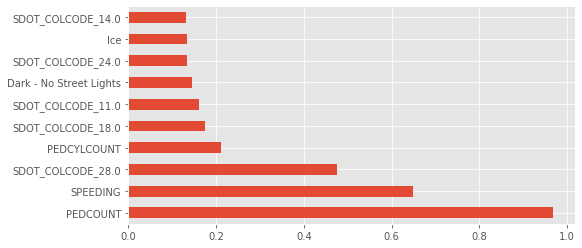

In [83]:
pd.Series(abs(SVM_model.coef_[0]), index=Feature.columns).nlargest(10).plot(kind='barh')
plt.savefig('./Figs/ZZ_SVM_features.png', bbox_inches='tight')

Normalized confusion matrix
[[0.7  0.3 ]
 [0.18 0.82]]


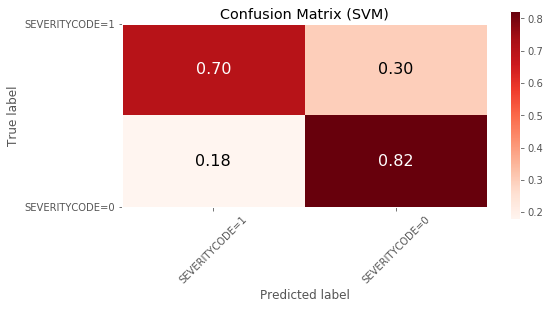

In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, SVM_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (8,4)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (SVM)', cmap=plt.cm.Reds)
plt.savefig('./Figs/Fig16_confusion_matrix_SVM.png', bbox_inches='tight')

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

## K Nearest Neighbour (KNN)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

def getbestk(k_in):
    #Train and predict
    kNN_model = KNeighborsClassifier(n_neighbors=k_in).fit(X_train,Y_train)
    yhat = kNN_model.predict(X_test)  
    mean_acc=np.mean(yhat==Y_test);
    std_acc=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
    outstring = str(mean_acc)+" "+str(std_acc)
    return outstring

In [87]:
Ks = 300
k_arr = np.arange(Ks)+1
kNN_df = pd.DataFrame({'K': k_arr})
kNN_df["SCORE_STRING"] = 0

print("Run the kNN model for k=0--"+str(Ks)+" in order to choose the best Ks")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    kNN_df["SCORE_STRING"] = list(tqdm(pool.map(getbestk, kNN_df["K"], chunksize=10), total=kNN_df.shape[0]))
        
#Split the score string based on whitespace
kNN_df[["MEAN_ACC", "STD_ACC"]] = kNN_df.SCORE_STRING.str.split(expand=True)
kNN_df["MEAN_ACC"] = kNN_df.MEAN_ACC.astype(float)
kNN_df["STD_ACC"] = kNN_df.STD_ACC.astype(float)

#Convert DataFrame back to Numpy arrays
mean_acc_column = kNN_df.loc[:,"MEAN_ACC"]
mean_acc = mean_acc_column.values
std_acc_column = kNN_df.loc[:,"STD_ACC"]
std_acc = std_acc_column.values

Run the kNN model for k=0--300 in order to choose the best Ks


Plot model accuracy for different number of neighbours

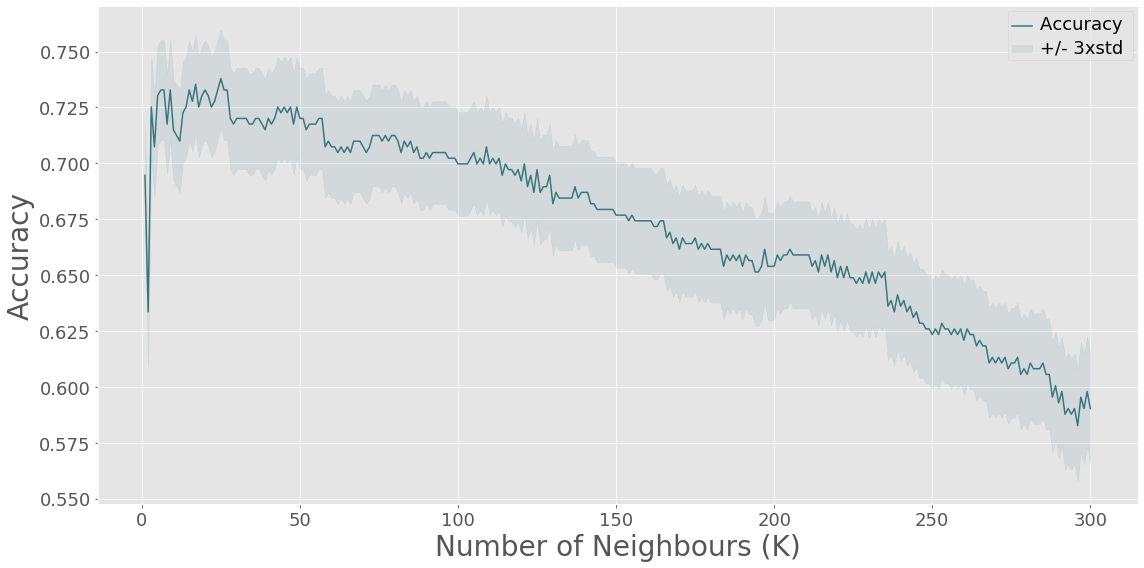

In [88]:
plt.rcParams["figure.figsize"] = (16,8)

plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

plt.plot(k_arr,mean_acc,'g' , color='#37777D')
plt.fill_between(k_arr,mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color='#37777D')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.setp(plt.gca().get_legend().get_texts(), fontsize='18')
plt.ylabel('Accuracy', size=28)
plt.xlabel('Number of Neighbours (K)', size=28)

plt.tight_layout()
plt.savefig('./Figs/Fig17_kNN_best_K.png', bbox_inches='tight')

In [89]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7379134860050891 with k= 25


In [90]:
#Re-run the model with the best K  
print("Fitting with k="+str(mean_acc.argmax()+1))
kNN_model = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train,Y_train)
kNN_yhat = kNN_model.predict(X_test)  
kNN_model

Fitting with k=25


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [91]:
#Model evaluation
print("Accuracy of kNN model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, kNN_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, kNN_yhat))
print("F1-score: %.2f" % f1_score(Y_test, kNN_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(kNN_yhat , Y_test) )
print(classification_report(Y_test, kNN_yhat))

Accuracy of kNN model:
Train set Accuracy:  0.7530054644808744
Test set Accuracy:  0.7379134860050891
Jaccard index: 0.74
F1-score: 0.73
R2-score: -0.10
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       185
           1       0.84      0.62      0.71       208

    accuracy                           0.74       393
   macro avg       0.76      0.75      0.74       393
weighted avg       0.76      0.74      0.73       393



/home/alasdair/bin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Normalized confusion matrix
[[0.62 0.38]
 [0.13 0.87]]


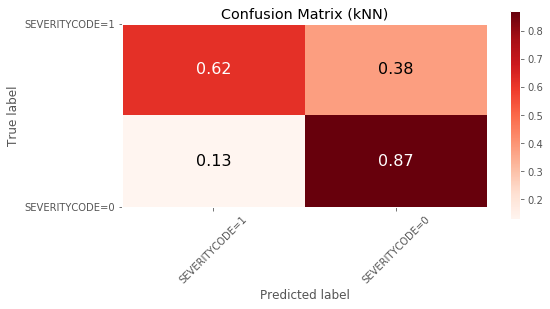

In [92]:
#Return plot parameters to their normal values
#plt.rc('xtick',labelsize=10)
#plt.rc('ytick',labelsize=10)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, kNN_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plt.rcParams["figure.figsize"] = (8,4)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (kNN)', cmap=plt.cm.Reds)
plt.savefig('./Figs/Fig18_confusion_matrix_kNN.png', bbox_inches='tight')

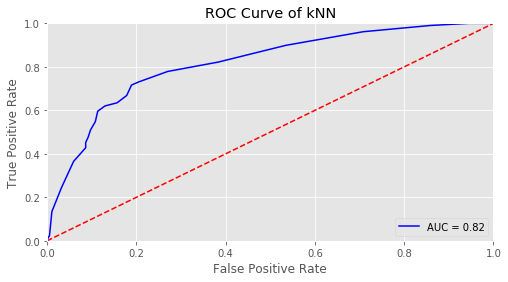

In [93]:
knn_y_scores = kNN_model.predict_proba(X_test)
knn_fpr, knn_tpr, threshold = roc_curve(Y_test, knn_y_scores[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.title('Receiver Operating Characteristic (KNN)')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,Y_train)

/home/alasdair/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
LR_yhat = LR_model.predict(X_test)

In [96]:
#Model evaluation
print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, LR_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, LR_yhat))
print("F1-score: %.2f" % f1_score(Y_test, LR_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(LR_yhat , Y_test) )
print(classification_report(Y_test, LR_yhat))

Accuracy of Logistic Regression model:
Train set Accuracy:  0.7912568306010929
Test set Accuracy:  0.7659033078880407
Jaccard index: 0.77
F1-score: 0.77
R2-score: 0.05
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       185
           1       0.83      0.70      0.76       208

    accuracy                           0.77       393
   macro avg       0.77      0.77      0.77       393
weighted avg       0.78      0.77      0.77       393



/home/alasdair/bin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Normalized confusion matrix
[[0.7  0.3 ]
 [0.16 0.84]]


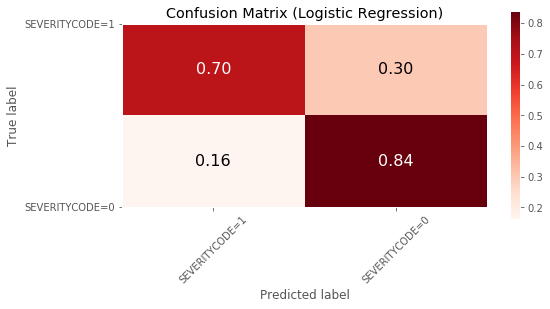

In [97]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, LR_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (8,4)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (Logistic Regression)', cmap=plt.cm.Reds)
plt.savefig('./Figs/Fig19_confusion_matrix_LR.png', bbox_inches='tight')

Normalized confusion matrix
[[0.7  0.3 ]
 [0.16 0.84]]
Normalized confusion matrix
[[0.64 0.36]
 [0.31 0.69]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.18 0.82]]
Normalized confusion matrix
[[0.62 0.38]
 [0.13 0.87]]


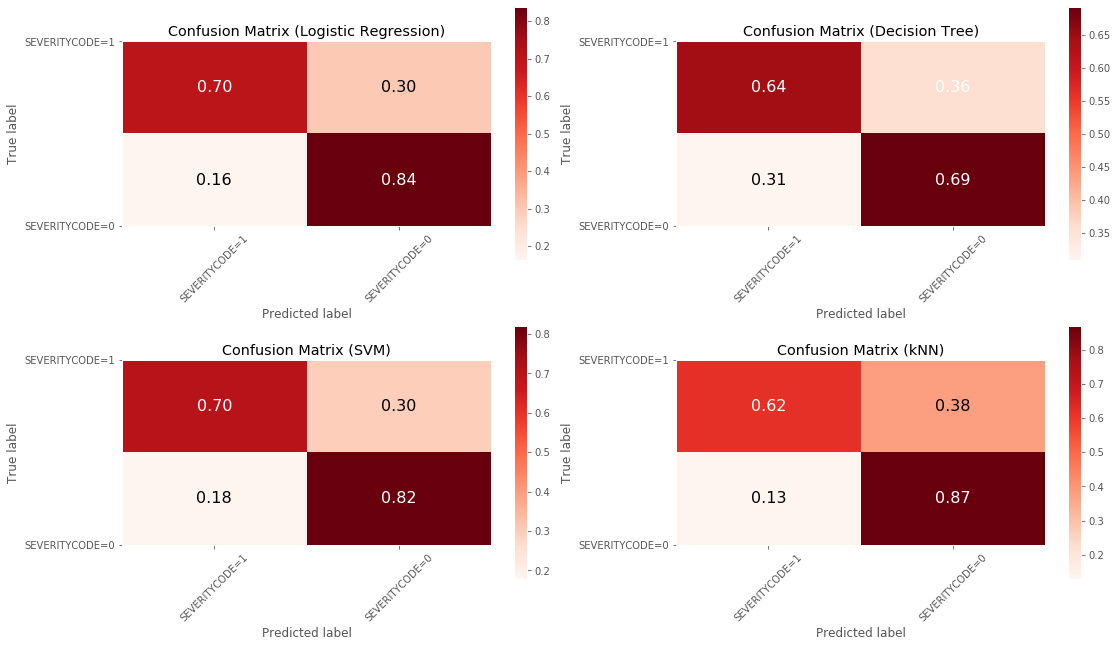

In [98]:
#Make a figure showing the four confusion matrices
plt.rcParams["figure.figsize"] = (16,9)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

#1 - Logistic regression
plt.subplot(2,2,1)
cnf_matrix = confusion_matrix(Y_test, LR_yhat, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (Logistic Regression)', cmap=plt.cm.Reds)

#2 - Decision Tree
plt.subplot(2,2,2)
cnf_matrix = confusion_matrix(Y_test, DT_yhat, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (Decision Tree)', cmap=plt.cm.Reds)

#3 - Support Vector Machine
plt.subplot(2,2,3)
cnf_matrix = confusion_matrix(Y_test, SVM_yhat, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (SVM)', cmap=plt.cm.Reds)

#4 - k-Nearest Neighbours
plt.subplot(2,2,4)
cnf_matrix = confusion_matrix(Y_test, kNN_yhat, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (kNN)', cmap=plt.cm.Reds)

plt.savefig('./Figs/Fig20_confusion_matrix_all.png', bbox_inches='tight')

## About this system

In [99]:
import psutil
import platform
from datetime import datetime

global_endtime = time.time()
global_elapsed_time = time.time() - start_time

print("This notebook took "+str(strftime("%H:%M:%S", gmtime(global_elapsed_time)))+" minutes to run on a machine with the following specification:")

#Useful function to round bytes to MB or GB properly
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
        
#System Info
print("="*40, "System Information", "="*40)
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")
# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
#print("Physical cores:", psutil.cpu_count(logical=False))
print("Logical cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz")
# Memory Information
print("="*40, "Memory Information", "="*40)
# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")
print(f"Percentage: {svmem.percent}%")
print("="*40, "SWAP", "="*40)
# get the swap memory details (if exists)
swap = psutil.swap_memory()
print(f"Total: {get_size(swap.total)}")
print(f"Free: {get_size(swap.free)}")
print(f"Used: {get_size(swap.used)}")
print(f"Percentage: {swap.percent}%")

This notebook took 00:08:26 minutes to run on a machine with the following specification:
======================================== System Information ========================================
System: Linux
Node Name: prometheus
Release: 5.4.0-47-generic
Version: #51~18.04.1-Ubuntu SMP Sat Sep 5 14:35:50 UTC 2020
Machine: x86_64
Processor: x86_64
======================================== CPU Info ========================================
Logical cores: 32
Max Frequency: 3800.00Mhz
Min Frequency: 1200.00Mhz
Current Frequency: 1236.71Mhz
======================================== Memory Information ========================================
Total: 125.87GB
Available: 119.78GB
Used: 5.14GB
Percentage: 4.8%
======================================== SWAP ========================================
Total: 7.45GB
Free: 7.45GB
Used: 0.00B
Percentage: 0.0%
